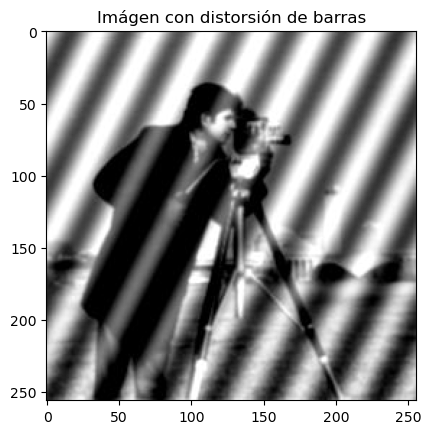

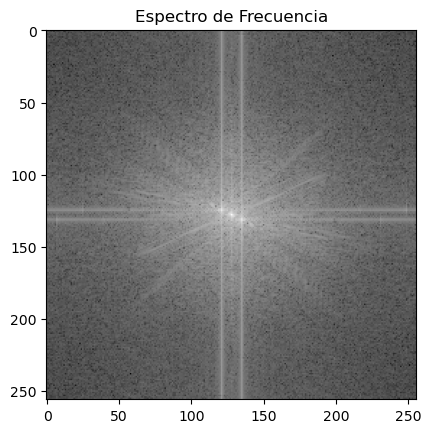

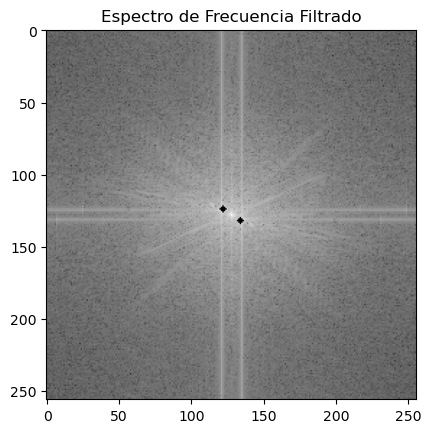

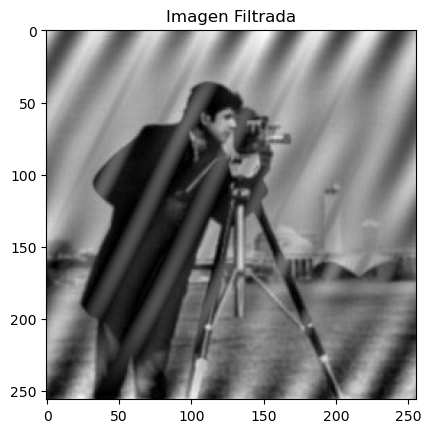

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
img_O = cv2.imread('ImagenBarras.jpg',0)

plt.imshow(img_O, cmap='gray')
plt.title('Imágen con distorsión de barras')
plt.show()

f_transform = np.fft.fft2(img_O)
f_shift = np.fft.fftshift(f_transform)
magnitude_spectrum = 20 * np.log(np.abs(f_shift))


plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Espectro de Frecuencia')
plt.show()

rows, cols = img_O.shape
crow, ccol = rows // 2, cols // 2  

mask_arriba_derecha = (crow - 4, ccol - 6) 

mask_abajo_izquierda = (crow + 4, ccol + 6)  


mask = np.ones((rows, cols), np.uint8)
radio = 2  
cv2.circle(mask, mask_arriba_derecha[::-1], radio, 0, -1)  
cv2.circle(mask, mask_abajo_izquierda[::-1], radio, 0, -1)  

f_shift_filtered = f_shift * mask


magnitude_spectrum_filtered = 20 * np.log(np.abs(f_shift_filtered)+ 1e-1)

plt.imshow(magnitude_spectrum_filtered, cmap='gray')
plt.title('Espectro de Frecuencia Filtrado')
plt.show()


f_ishift = np.fft.ifftshift(f_shift_filtered)
image_filtered = np.fft.ifft2(f_ishift)
image_filtered = np.abs(image_filtered)



plt.imshow(image_filtered, cmap='gray')
plt.title('Imagen Filtrada')
plt.show()

In [5]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.
